# How did Brazilian Politicians Discuss January 8th on Twitter? #

An lexical analysis of tweets made by Brazilian Senators (senadores/as) and Congresspeople (deputados/as federais), focusing on how they approached January 8th episodes (*when Bolsonaro's supporters invaded and plundered Brazil's federal government buildings in the capital, Brasília*).

Data collected with the help of the [Junkipedia project](https://www.junkipedia.org/).

--- --- ---
**DISCLAIMER:** The coding presents a confusing mix of English and Portuguese (exactly how my brain works). *Sorry for that.*
--- --- ---

## #1 I've started by installing packages and importing libraries: ##

In [1]:
%pip install wordcloud
%pip install scikit-learn

%pip install seaborn
%pip install seaborn[stats]

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import seaborn.objects as so


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_excel('db_project1.xlsx')
df

C:\Users\rafas\OneDrive\Área de Trabalho\Lede Program\project_jan8


,PostId,PostUrl,Platform,ChannelID,cargo,grupo,ChannelName,ChannelEngagement,imprensa,democracia,post_body_text,mes,published_at,SharesCount,CommentsCount,ViewsCount
0,122175004,https://twitter.com/AcacioFavacho/status/16570...,Twitter,16482799,Deputado,centro,Acácio Favacho,"{""follower_count"":4250,""following_count"":425,""...",NO,NO,"Hoje no Dia Internacional da Enfermagem, temos...",mai,2023-05-12,0,1,245.0
1,122481502,https://twitter.com/WSJ/status/165704519249766...,Twitter,16482799,Deputado,centro,Acácio Favacho,"{""follower_count"":4250,""following_count"":425,""...",NO,NO,"Exclusive Access to WSJ Coverage of Business, ...",mai,2023-05-12,12,15,952079.0
2,122481509,https://twitter.com/plusmediasolut1/status/165...,Twitter,16482799,Deputado,centro,Acácio Favacho,"{""follower_count"":4250,""following_count"":425,""...",NO,NO,Help tackle #ClimateChange and build a better ...,mai,2023-05-12,7,21,98446.0
3,121725078,https://twitter.com/AcacioFavacho/status/16566...,Twitter,16482799,Deputado,centro,Acácio Favacho,"{""follower_count"":4250,""following_count"":425,""...",NO,NO,AO VIVO! CDU e ALAP mesa redonda sobre a extin...,mai,2023-05-11,3,1,252.0
4,122481503,https://twitter.com/DailyBee3/status/165665263...,Twitter,16482799,Deputado,centro,Acácio Favacho,"{""follower_count"":4250,""following_count"":425,""...",NO,NO,Turn your backyard into a space you'll want to...,mai,2023-05-11,1,1,4879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,122329470,https://twitter.com/icarodevalmir/status/16240...,Twitter,17183000,Deputado,direita,Deputado Ícaro de Valmir,"{""follower_count"":663,""following_count"":33,""li...",NO,NO,É inaceitável que o BNDES tenha suspendido 9 l...,fev,2023-02-10,3,95,6486.0
28758,122329471,https://twitter.com/icarodevalmir/status/16236...,Twitter,17183000,Deputado,direita,Deputado Ícaro de Valmir,"{""follower_count"":663,""following_count"":33,""li...",NO,NO,"Deem graças em todas as circunstâncias, pois e...",fev,2023-02-09,0,60,3475.0
28759,122329474,https://twitter.com/icarodevalmir/status/16171...,Twitter,17183000,Deputado,direita,Deputado Ícaro de Valmir,"{""follower_count"":663,""following_count"":33,""li...",NO,NO,"Aproveitando o nosso domingo do melhor jeito, ...",jan,2023-01-22,0,28,2041.0
28760,122329475,https://twitter.com/icarodevalmir/status/16160...,Twitter,17183000,Deputado,direita,Deputado Ícaro de Valmir,"{""follower_count"":663,""following_count"":33,""li...",NO,NO,Bom dia! Começando por aqui!,jan,2023-01-19,0,14,1435.0


## #2 Cleaning the database to focus on: ##
    
        1. The day I want (January 8th);
        2. The topic I want (tweets that contain the word 'democracy' -- I've created this variable directly on the spreadsheet, filtering the cells by content).

In [ ]:
# Filtering the data by date
# Month first
df.dtypes
df.mes.value_counts()
# 2453 tweets were published in January (jan)
df_jan = df[df.mes == 'jan']
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2453 entries, 29 to 28761
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PostId             2453 non-null   int64         
 1   PostUrl            2453 non-null   object        
 2   Platform           2453 non-null   object        
 3   ChannelID          2453 non-null   int64         
 4   cargo              2453 non-null   object        
 5   grupo              2453 non-null   object        
 6   ChannelName        2453 non-null   object        
 7   ChannelEngagement  2453 non-null   object        
 8   imprensa           2453 non-null   object        
 9   democracia         2453 non-null   object        
 10  post_body_text     2451 non-null   object        
 11  mes                2453 non-null   object        
 12  published_at       2453 non-null   datetime64[ns]
 13  SharesCount        2453 non-null   int64         
 14  CommentsCou

In [ ]:
# Creating a subcorpus only with tweets published on January 8th
df_jan.published_at.value_counts()
# 276 tweets were published on January 8th (2023-01-08)
df_8jan = df_jan[df_jan.published_at == '2023-01-08']
df_8jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 29 to 28605
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PostId             276 non-null    int64         
 1   PostUrl            276 non-null    object        
 2   Platform           276 non-null    object        
 3   ChannelID          276 non-null    int64         
 4   cargo              276 non-null    object        
 5   grupo              276 non-null    object        
 6   ChannelName        276 non-null    object        
 7   ChannelEngagement  276 non-null    object        
 8   imprensa           276 non-null    object        
 9   democracia         276 non-null    object        
 10  post_body_text     274 non-null    object        
 11  mes                276 non-null    object        
 12  published_at       276 non-null    datetime64[ns]
 13  SharesCount        276 non-null    int64         
 14  CommentsCoun

# Descriptive analysis #
## #1 Describing the corpus' features and plotting everything: ##

**Plotting:** I got some references [here](https://medium.com/geekculture/create-beautiful-graphs-with-python-4235f50b2adb), [here](https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392), and [here](https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f). I used this Seaborn guide [here](https://seaborn.pydata.org/) (chose it because I like the name ^^).

Finding the tweets that contain the word "democracy" in it...
        
        1. ...published on January 8th;

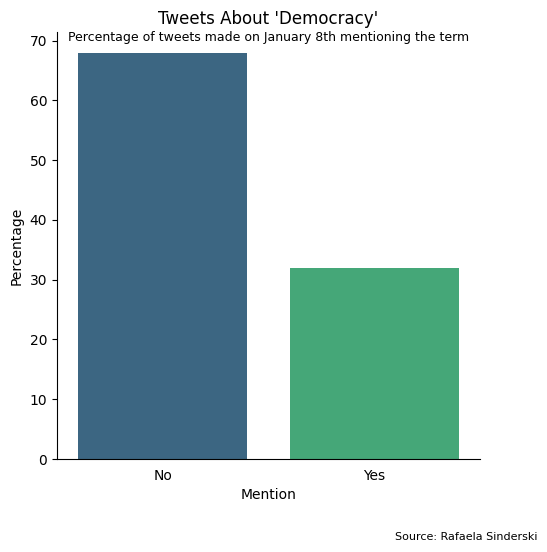

In [ ]:
# How many tweets about democracy there are in the `8jan` subcorpus?
df_8jan.democracia.value_counts()
# 87 tweets with the word 'democracy' in it

# What is the percentage?
dem_perc = (df_8jan.democracia.value_counts() / len(df_8jan)) * 100
dem_perc = dem_perc.round()
dem_perc.to_frame()#.plot(kind='barh')
# 32%

# Plot with catplot!
chart1 = sns.catplot(data=dem_perc.reset_index(), x='democracia', y='count', kind='bar', palette='viridis')
chart1.set_xticklabels(['No', 'Yes'])

plt.xlabel('Mention')
plt.ylabel('Percentage')
plt.title("Tweets About 'Democracy'")
plt.text(0.5, 0.98, "Percentage of tweets made on January 8th mentioning the term", transform=plt.gca().transAxes, ha='center', fontsize=9)
plt.tick_params(axis='x', bottom=False)
source_text = "Source: Rafaela Sinderski"
plt.text(0.8, -0.19, source_text, transform=plt.gca().transAxes, ha='left', fontsize=8)
plt.savefig('chart1.png', dpi=300, bbox_inches='tight')
plt.show()

        2. ...per position (Congressperson or Senator);

In [ ]:
dem_position = df_8jan.groupby(by='cargo').democracia.value_counts()
dem_position

# Congresspeople (deputados)
total_deputados = dem_position['Deputado']['SIM'] + dem_position['Deputado']['NO']
dem_deputados = dem_position['Deputado']['SIM'] / total_deputados * 100
dem_deputados = dem_deputados.round()
dem_deputados

# 32% of tweets made by Congresspeople on January 8th mentioned 'democracy'

32.0

In [ ]:
# Senators (senadores)
total_senadores = dem_position['Senador']['SIM'] + dem_position['Senador']['NO']
dem_senadores = dem_position['Senador']['SIM'] / total_senadores * 100
dem_senadores = dem_senadores.round()
dem_senadores

# 31% of tweets made by senators on January 8th mentioned 'democracy'

31.0

        3. ...per political group (right/center/left wing);

I used [this article](https://www1.folha.uol.com.br/poder/2022/09/o-que-faz-um-partido-ser-de-direita-ou-esquerda-folha-cria-metrica-que-posiciona-legendas.shtml) to define the political group of each political actor, according to their parties -- I also did it directly on the spreadsheet.

In [ ]:
# Number of tweets made on January 8th per group
df_8jan.grupo.value_counts()
# Left-wing: 110
# Right-wing: 109
# Center: 57

grupo
esquerda    110
direita     109
centro       57
Name: count, dtype: int64

In [ ]:
# Tweets mentioning democracy per group
dem_group = df_8jan.groupby(by='grupo').democracia.value_counts()
dem_group

grupo     democracia
centro    NO            34
          SIM           23
direita   NO            75
          SIM           34
esquerda  NO            80
          SIM           30
Name: count, dtype: int64

In [ ]:
# Tweets mentioning democracy made by right-wing politicians (direita)
total_right = dem_group['direita']['SIM'] + dem_group['direita']['NO']
dem_right = dem_group['direita']['SIM'] / total_right * 100
dem_right = dem_right.round()
dem_right
# 31%

31.0

In [ ]:
# Tweets mentioning democracy made by left-wing politicians (esquerda)
total_left = dem_group['esquerda']['SIM'] + dem_group['esquerda']['NO']
dem_left = dem_group['esquerda']['SIM'] / total_left * 100
dem_left = dem_left.round()
dem_left
# 27%
# It means that right-wing politicians mentioned 'democracy' more in their tweets, considering the proportion of tweets they published on January 8th

27.0

In [ ]:
# Tweets mentioning democracy made by politicians from the center of the political-ideological spetrum (centro)
total_center = dem_group['centro']['SIM'] + dem_group['centro']['NO']
dem_center = dem_group['centro']['SIM'] / total_center * 100
dem_center = dem_center.round()
dem_center
# 40%
# Politicians aligned to the center of the political-ideological spectrum mentioned 'democracy' more

40.0

# Temporal analysis #

Did the topic 'democracy' keep on being discussed during the days that followed January 8th?

In [ ]:
# Analysing mentions in the week that followed January 8th -- until January 15th
# Creating new dfs considering the days
df_9jan = df_jan[df_jan.published_at == '2023-01-09']
df_10jan = df_jan[df_jan.published_at == '2023-01-10']
df_11jan = df_jan[df_jan.published_at == '2023-01-11']
df_12jan = df_jan[df_jan.published_at == '2023-01-12']
df_13jan = df_jan[df_jan.published_at == '2023-01-13']
df_14jan = df_jan[df_jan.published_at == '2023-01-14']
df_15jan = df_jan[df_jan.published_at == '2023-01-15']

In [ ]:
# All tweets made each day mentioning democracy
df_8jan_dem = df_8jan[df_8jan.democracia == 'SIM']
df_9jan_dem = df_9jan[df_9jan.democracia == 'SIM']
df_10jan_dem = df_10jan[df_10jan.democracia == 'SIM']
df_11jan_dem = df_11jan[df_11jan.democracia == 'SIM']
df_12jan_dem = df_12jan[df_12jan.democracia == 'SIM']
df_13jan_dem = df_13jan[df_13jan.democracia == 'SIM']
df_14jan_dem = df_14jan[df_14jan.democracia == 'SIM']
df_15jan_dem = df_15jan[df_15jan.democracia == 'SIM']

df_8jan_ndem = len(df_8jan_dem)
df_9jan_ndem = len(df_9jan_dem)
df_10jan_ndem = len(df_10jan_dem)
df_11jan_ndem = len(df_11jan_dem)
df_12jan_ndem = len(df_12jan_dem)
df_13jan_ndem = len(df_13jan_dem)
df_14jan_ndem = len(df_14jan_dem)
df_15jan_ndem = len(df_15jan_dem)


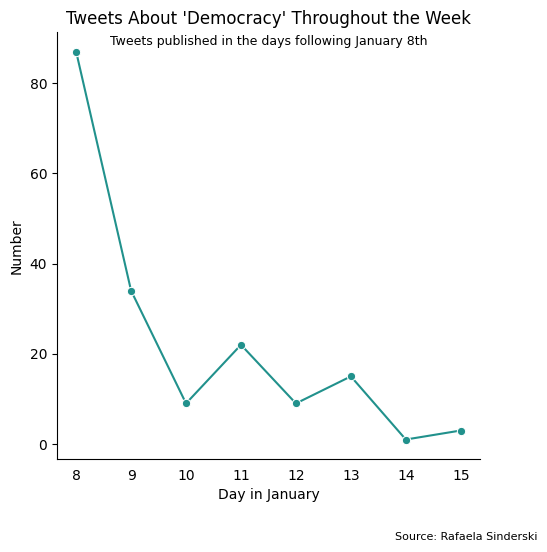

In [ ]:
# Saving in a `week` variable and transforming it into a df to be plottted
week = [df_8jan_ndem, df_9jan_ndem, df_10jan_ndem, df_11jan_ndem, df_12jan_ndem, df_13jan_ndem, df_14jan_ndem, df_15jan_ndem]
df_week = pd.DataFrame({'8': df_8jan_ndem,
                   '9': df_9jan_ndem,
                   '10': df_10jan_ndem,
                   '11': df_11jan_ndem,
                   '12': df_12jan_ndem,
                   '13': df_13jan_ndem,
                   '14': df_14jan_ndem,
                   '15': df_15jan_ndem},
                  index=['n_tweets'])
df_week = df_week.transpose()
df_week#.plot()

# Plot!
sns.relplot(data=df_week, kind='line', palette='viridis', legend=False, markers=True)
plt.xlabel('Day in January')
plt.ylabel('Number')
plt.title("Tweets About 'Democracy' Throughout the Week")
plt.text(0.5, 0.97, "Tweets published in the days following January 8th", transform=plt.gca().transAxes, ha='center', fontsize=9)
source_text = "Source: Rafaela Sinderski"
plt.text(0.8, -0.19, source_text, transform=plt.gca().transAxes, ha='left', fontsize=8)
plt.tick_params(axis='x', bottom=False)
plt.savefig('linechart.png', dpi=300, bbox_inches='tight')
plt.show()

# Word cloud #

Finding the most used terms on tweets **published during January 8th.**
(We know that ~democracy~ may show up. But what else?)

This [very nice article](https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f) helped me with it.

## #1 Creating a TF-IDF Matrix ##

        
        1. I first created a .txt with all the tweets from January 8th (stored at df_8jan['post_body_text']);

This [very, very nice article](https://towardsdatascience.com/tf-idf-a-visual-explainer-and-python-implementation-on-presidential-inauguration-speeches-2a7671168550) helped me with it.

P.S.: Info about `fmt='%s'` [here](https://stackoverflow.com/questions/48230230/typeerror-mismatch-between-array-dtype-object-and-format-specifier-18e) and [here](https://stackoverflow.com/questions/17043393/setting-the-fmt-option-in-numpy-savetxt).

P.S. 2: I didn't even use it in my analysis... 🤡


In [ ]:
%pip install numpy
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Saving my corpus to a text file
x = df_8jan['post_body_text']
np.savetxt('tweets_8jan.txt', x, fmt='%s', encoding='utf-8')

# Loaging the corpus from the text file
# I don't really understand what the 'r' means, but it worked ¯\__O__/¯
with open('tweets_8jan.txt', 'r', encoding = 'utf-8') as file:
    corpus = file.read().splitlines()

In [ ]:
# Transforming my file of stopwords in portuguese into a list
stopwords = pd.read_fwf('portuguese.txt', header = None)
stopwords = stopwords.values.tolist()
stopwords = [s[0] for s in stopwords]

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range = (1,1), max_df = .6, min_df = .01)
# Note for my future self: 'y' is arbitrary
# Applying `TfidfVectorizer`` to the texts. Y is a sparse matrix which holds the location of all non-zero values
y = vectorizer.fit_transform(corpus)

# Extract words (‘feature names’) from vectorizer
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Creating a dense matrix to convert into a list, and then a dataframe
dense = y.todense()
denselist = dense.tolist()
df_matrix = pd.DataFrame(denselist, columns=feature_names)

df_matrix.head()

,absurdo,acontecendo,agora,além,amigo,amigos,anderson,antidemocráticas,antidemocráticos,aspectos,...,vai,vamos,vandalismo,vasco,veementemente,violentos,violência,viva,você,ídolo
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.17811,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.444231,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.229513,0.0,0.0,0.0,0.261832,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Turn columns into rows
data = df_matrix.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,384,385,386
absurdo,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
acontecendo,0.0,0.0,0.0,0.444231,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
agora,0.0,0.0,0.0,0.000000,0.229513,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.292041,0.0,0.0,0.0,0.0,0.0,0.0
além,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.309471,0.0,0.0,0.0,0.0,0.0,0.0
amigo,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
violentos,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
violência,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.433199,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
viva,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
você,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Finding the top 30 words used in the tweets
top30 = {}
# Adding a loop to iterate over the columns
# The .iloc[:, c] syntax selects all rows (:) and the column at index c
# The variable c represents the column index
for c in range(data.shape[1]):
    top = data.iloc[:, c].sort_values(ascending=False).head(30)
    top30[data.columns[c]] = list(zip(top.index, top.values))

# Printing the top 30 words
for column, top_words in top30.items():
    print(column)
    print(', '.join([word for word, count in top_words]))
    print('---')

0
direitos, pacíficas, crimes, poder, sempre, nação, manifestações, nossa, poderes, contra, não, pedido, país, planalto, paz, patrimônio, parte, parlamentar, pessoas, absurdo, pode, podemos, policiais, política, povo, precisa, precisam, precisamos, preciso, presidente
---
1
depredar, nunca, brasileiro, lamentáveis, invadir, história, prédios, nação, cenas, povo, ato, mais, nossa, brasil, nacional, vandalismo, congresso, hoje, não, pedido, planalto, país, paz, patrimônio, pessoas, podemos, pode, podem, parlamentar, poder
---
2
repudiamos, nós, terroristas, rt, atos, absurdo, planalto, pacíficas, palácio, parlamentar, parte, patrimônio, paz, país, pedido, pessoas, pode, ordem, podem, podemos, poder, poderes, policiais, política, povo, precisa, precisam, precisamos, preciso, presidente
---
3
acontecendo, inaceitável, palácio, invasão, planalto, rt, nacional, congresso, brasília, pacíficas, parlamentar, parte, patrimônio, pode, paz, país, pedido, pessoas, absurdo, podem, podemos, poder, po

**Important:** There are 276 tweets containing the word 'democracy' published on January 8th. However, the analysis gave me 387 'documents' (considering the number of rows, each with its relevant words). I think the process may have 'broken' tweets into more rows (hence, into more documents) -- it makes sense, because tweets have different lenghts and one tweet isn't always == one line/row. But my analysis has only one document (one corpus with all the tweets). If I can eliminate the repeated words, I may end up with the main words used in the tweets from my corpus.

In [ ]:
print(top30)
len(top30)
top30.keys()

{0: [('direitos', 0.36857956377440404), ('pacíficas', 0.3480671456328605), ('crimes', 0.3480671456328605), ('poder', 0.3321564780297785), ('sempre', 0.3253606348108038), ('nação', 0.3191565160324885), ('manifestações', 0.2902458864321164), ('nossa', 0.25874215703342146), ('poderes', 0.2562400622070987), ('contra', 0.23696771681557266), ('não', 0.17548912334520334), ('pedido', 0.0), ('país', 0.0), ('planalto', 0.0), ('paz', 0.0), ('patrimônio', 0.0), ('parte', 0.0), ('parlamentar', 0.0), ('pessoas', 0.0), ('absurdo', 0.0), ('pode', 0.0), ('podemos', 0.0), ('policiais', 0.0), ('política', 0.0), ('povo', 0.0), ('precisa', 0.0), ('precisam', 0.0), ('precisamos', 0.0), ('preciso', 0.0), ('presidente', 0.0)], 1: [('depredar', 0.27711550986184275), ('nunca', 0.27711550986184275), ('brasileiro', 0.27711550986184275), ('lamentáveis', 0.2697370616881569), ('invadir', 0.2632288091548091), ('história', 0.2632288091548091), ('prédios', 0.2574069788791372), ('nação', 0.24733256767657746), ('cenas', 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
# Creating a new list with non-repeated words
words = []
# `word_list` iterates over the values of the `top30` dictionary and its lists
# For each item in the lists (a word-number pair), it checks if the word is already in the `words` list and adds it if it's not
# The extend method is used to add multiple elements to the words list at once
for word_list in top30.values():
    words.extend([word for word, count in word_list if word not in words])

# Now, `words` will contain all the unique words from the dictionary's values without any repeated items
print(words)
len(words)
# I ended up with 232 unique relevant words

['direitos', 'pacíficas', 'crimes', 'poder', 'sempre', 'nação', 'manifestações', 'nossa', 'poderes', 'contra', 'não', 'pedido', 'país', 'planalto', 'paz', 'patrimônio', 'parte', 'parlamentar', 'pessoas', 'absurdo', 'pode', 'podemos', 'policiais', 'política', 'povo', 'precisa', 'precisam', 'precisamos', 'preciso', 'presidente', 'depredar', 'nunca', 'brasileiro', 'lamentáveis', 'invadir', 'história', 'prédios', 'cenas', 'ato', 'mais', 'brasil', 'nacional', 'vandalismo', 'congresso', 'hoje', 'podem', 'repudiamos', 'nós', 'terroristas', 'rt', 'atos', 'palácio', 'ordem', 'acontecendo', 'inaceitável', 'invasão', 'brasília', 'golpe', 'brasilia', 'tentativa', 'torres', 'ex', 'anderson', 'bolsonaro', 'secretário', 'ministro', 'república', 'justiça', 'agora', 'criminosos', 'qualquer', 'segurança', 'df', 'nada', 'bolsonaristas', 'pública', 'governo', 'stf', 'estado', 'exercício', 'tudo', 'atentado', 'públicos', 'direito', 'depredação', 'democrático', 'co', 'https', 'prisão', 'nosso', 'atentam', '

232

## #2 Creating the word cloud (finally!) ##

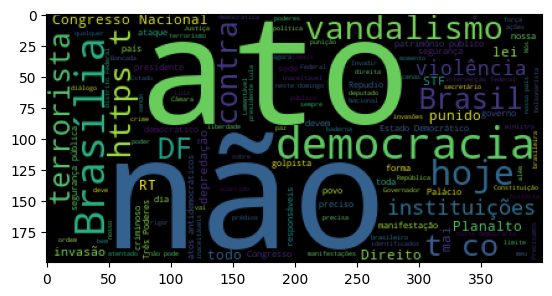

In [ ]:
# Here, ' '.join(corpus) concatenates the texts in the `corpus` into a single string (since it's a list), where the texts are separated by space
# `generate()` is the method of the WordCloud class
# Using the list of stop words in portuguese as the `stopwords` variable
wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(corpus))
plt.imshow(wordcloud)

Changing the settings of this VERY UGLY word cloud. :')
Using the `mask` parameter to change its shape.

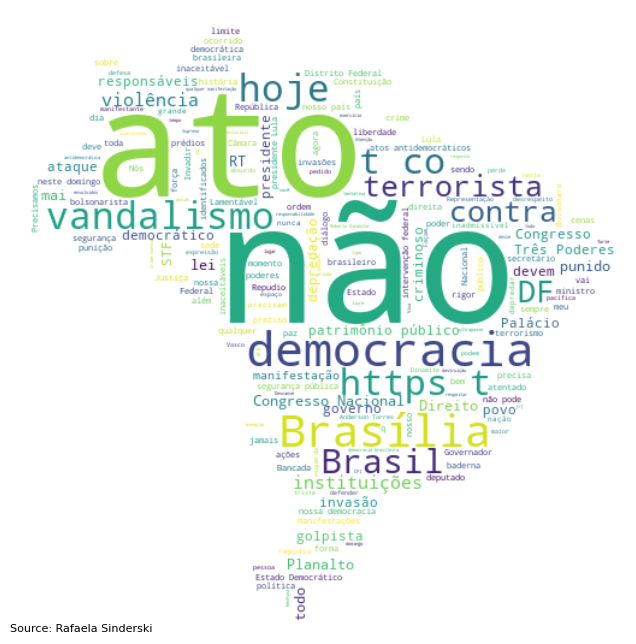

In [ ]:
from PIL import Image

# Loading the image
# `r` transforms the string in a path
custom_mask = np.array(Image.open(r'C:\Users\rafas\OneDrive\Área de Trabalho\Lede Program\project_jan8\map_br.png'))

# Generating the word cloud with the custom shape
wordcloud = WordCloud(stopwords=stopwords, mask=custom_mask, background_color='white', width=3000, height=2000).generate(' '.join(corpus))

# Ploting the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
source_text = "Source: Rafaela Sinderski"
plt.text(0, -0.01, source_text, transform=plt.gca().transAxes, ha='left', fontsize=8)
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

## #3 Creating word clouds for right/center/left wing groups ##

In [ ]:
# Right-wing
df_8jan_right = df_8jan[df_8jan.grupo == 'direita']

# Saving the corpus to a text file
rw = df_8jan_right['post_body_text']
np.savetxt('tweets_8jan_right.txt', rw, fmt='%s', encoding='utf-8')

# Loaging the corpus from the text file
# Again: I don't really understand what the 'r' means, but it worked ¯\__O__/¯
with open('tweets_8jan_right.txt', 'r', encoding = 'utf-8') as file:
    corpus_right = file.read().splitlines()

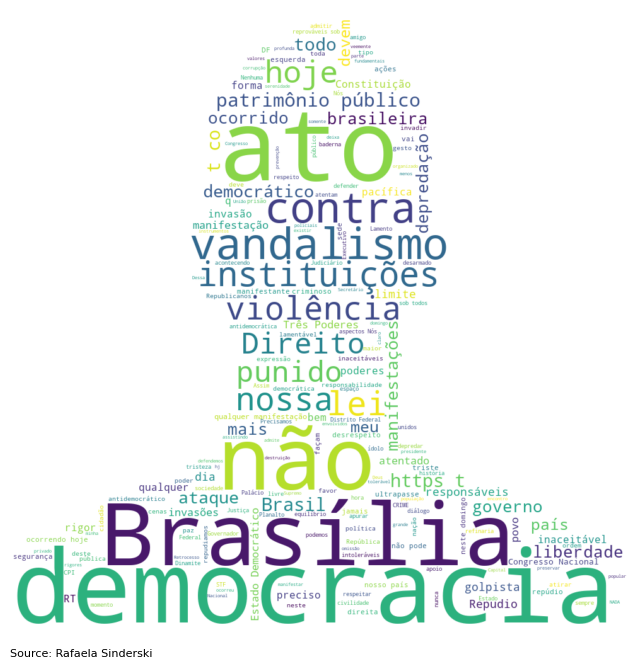

In [ ]:
# Word cloud using tweets made by right-wing politicians on January 8th
mask_right = np.array(Image.open(r'C:\Users\rafas\OneDrive\Área de Trabalho\Lede Program\project_jan8\anonymous-man.jpg'))

wordcloud_right = WordCloud(stopwords=stopwords, mask=mask_right, background_color='white', width=3000, height=2000).generate(' '.join(corpus_right))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_right, interpolation="bilinear")
plt.axis("off")
source_text = "Source: Rafaela Sinderski"
plt.text(0, -0.05, source_text, transform=plt.gca().transAxes, ha='left', fontsize=8)
plt.savefig('wordcloud_right.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Left-wing
df_8jan_left = df_8jan[df_8jan.grupo == 'esquerda']

lw = df_8jan_left['post_body_text']
np.savetxt('tweets_8jan_left.txt', lw, fmt='%s', encoding='utf-8')

with open('tweets_8jan_left.txt', 'r', encoding = 'utf-8') as file:
    corpus_left = file.read().splitlines()

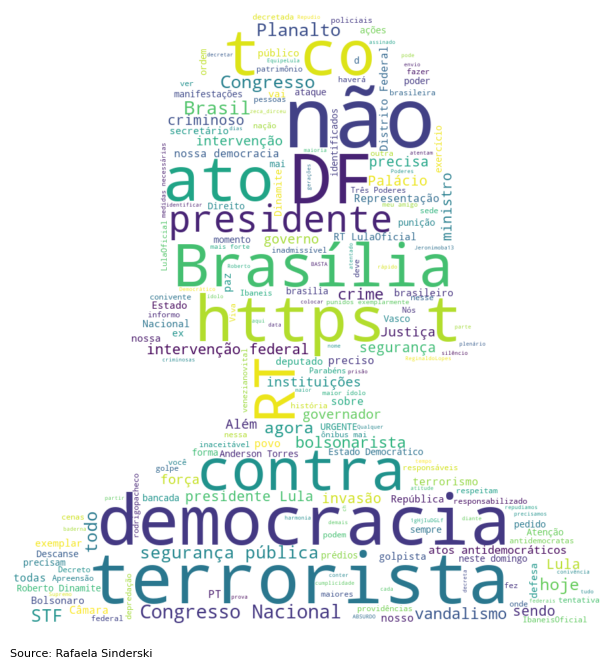

In [ ]:
# Word cloud using tweets made by left-wing politicians on January 8th
mask_left = np.array(Image.open(r'C:\Users\rafas\OneDrive\Área de Trabalho\Lede Program\project_jan8\anonymous-woman.jpg'))

wordcloud_left = WordCloud(stopwords=stopwords, mask=mask_left, background_color='white', width=3000, height=2000).generate(' '.join(corpus_left))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_left, interpolation="bilinear")
plt.axis("off")
source_text = "Source: Rafaela Sinderski"
plt.text(0, -0.05, source_text, transform=plt.gca().transAxes, ha='left', fontsize=8)
plt.savefig('wordcloud_left.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Politicians in the center
df_8jan_center = df_8jan[df_8jan.grupo == 'centro']

c = df_8jan_center['post_body_text']
np.savetxt('tweets_8jan_center.txt', c, fmt='%s', encoding='utf-8')

with open('tweets_8jan_center.txt', 'r', encoding = 'utf-8') as file:
    corpus_center = file.read().splitlines()

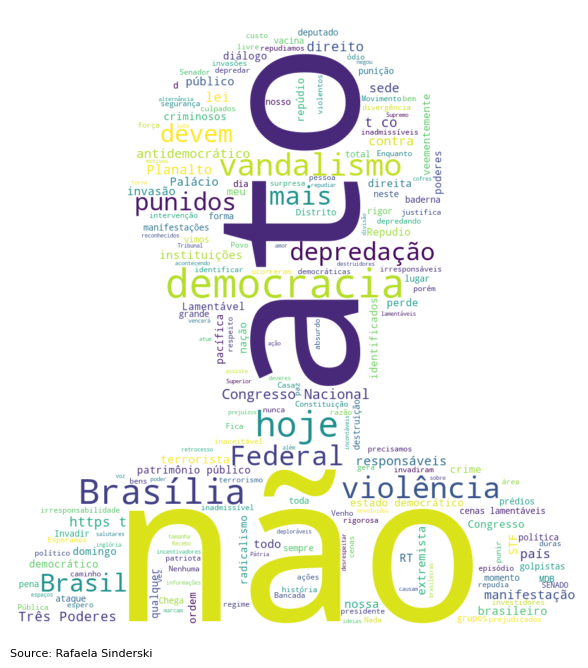

In [ ]:
# Word cloud using tweets made by politicians in the center of the political spectrum on January 8th
mask_center = np.array(Image.open(r'C:\Users\rafas\OneDrive\Área de Trabalho\Lede Program\project_jan8\anonymous-person.jpg'))

wordcloud_center = WordCloud(stopwords=stopwords, mask=mask_center, background_color='white', width=3000, height=2000).generate(' '.join(corpus_center))

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_center, interpolation="bilinear")
plt.axis("off")
source_text = "Source: Rafaela Sinderski"
plt.text(0, -0.05, source_text, transform=plt.gca().transAxes, ha='left', fontsize=8)
plt.savefig('wordcloud_center.png', dpi=300, bbox_inches='tight')
plt.show()